# Get started with the **Konfuzio SDK** 🚀


The [**Konfuzio SDK**](https://dev.konfuzio.com/sdk/index.html#what-is-the-konfuzio-sdk) (Konfuzio Software Development Kit) \
provides a [Python API](https://dev.konfuzio.com/sdk/sourcecode.html#api-reference) to interact with the [Konfuzio Server](https://dev.konfuzio.com/web/index.html#what-is-the-konfuzio-server).

This **notebook** will:
- run the **installation** of Konfuzio SDK in Google Colab 💿
- setup **credentials** you need to connect 🔑
- run the **initialization** for a connection to Konfuzio Server 🔗
- provide an example use case 🤓

If you don't have a Konfuzio account yet, create one [here](https://app.konfuzio.com/accounts/signup/).

---



In [1]:
%%capture
# @title # **Installation 💿** { display-mode: "form" }

# @markdown There are **two** installation **methods**:

# @markdown 1. **without**\
# @markdown `pip install konfuzio_sdk` \

# @markdown 2. and **with** the **AI-related dependencies** \
# @markdown `pip install konfuzio_sdk[ai]`

# @markdown By default, the SDK is installed without the AI-related dependencies. \
# @markdown This method is for the data-related SDK concepts without AI components.
# @markdown \
# @markdown \
# @markdown Here you can install the SDK according to your needs:
# @markdown \
Method = 'without AI dependencies' # @param ["without AI dependencies", "with AI dependencies"]

if Method == 'without AI dependencies':
  # without the AI-related dependencies
  !pip install -q konfuzio_sdk
else:
  # with the AI-related dependencies
  !pip install -q konfuzio_sdk[ai]

In [2]:
# @title # **Credentials and initialization 🔗** { display-mode: "form" }

# @markdown If you don't have a Konfuzio account yet, create one [here](https://app.konfuzio.com/accounts/signup/).
# @markdown \
# @markdown \

# @markdown ### Enter user name for Konfuzio Server

User_Name = "" # @param {type:"string"}

# @markdown ### Enter server host url
Host = "https://app.konfuzio.com" # @param {type:"raw"} #default: https://app.konfuzio.com

# @markdown \
# @markdown With the given credentials we establish a connection to the Konfuzio Server by running:

# @markdown ```bash
# @markdown konfuzio_sdk init --user {User_Name} --host {Host}
# @markdown ```

! konfuzio_sdk init --user {User_Name} --host {Host}

# @markdown The init command will create a Token to connect to the Konfuzio Server. This will create variables KONFUZIO_USER, KONFUZIO_TOKEN and KONFUZIO_HOST in an .env file in your working directory.

# @markdown The init command will ask for your Konfuzio login passwort. \
# @markdown **Enter password below ⬇**

Password you use to login to Konfuzio Server: 
[SUCCESS] SDK initialized!


In [1]:
# @title # **Initialization checks ✅** { display-mode: "form" }

# @markdown Google Colab needs a session restart after the installation of the SDK.

# @markdown To do so: \
# @markdown   1. open **Runtime** dropdown
# @markdown   2. select **Restart session**
# @markdown   3. click `Yes` and **run** this **cell**.

# @markdown This cell checks the runtime environment and if the initialized connection from Konfuzio SDK to Konfuzio Server is established correctly.

from IPython.display import Markdown, display

try:
  from konfuzio_sdk import KONFUZIO_HOST, KONFUZIO_USER
  display(Markdown("**SUCCESS** ✅"),
          Markdown(f"Konfuzio SDK is installed and Colab session was restarted."))
  if KONFUZIO_USER:
    # if user is given the initialization was successful and the user, token and host are stored within a .env file
    display(Markdown("**SUCCESS** ✅"),
            Markdown(f"You are connected with {KONFUZIO_USER} to {KONFUZIO_HOST}."))
  else:
    display(Markdown("**Connection failure** ⚠️"),
            Markdown("Something went wrong while establishing a connection to the server."),
            Markdown("Go to: **Runtime -> Disconnect and delete runtime**. Then run all cells from top to bottom again."))
except:
  display(Markdown("**Restart Session** ⚠️"),
          Markdown("You need to **restart 🔄** the Google **Colab Session**."),
          Markdown("Go to: **Runtime -> Restart session**. Then run this cell again and continue."))



**SUCCESS** ✅

Konfuzio SDK is installed and Colab session was restarted.

**SUCCESS** ✅

You are connected with nico.engelmann@konfuzio.com to https://app.konfuzio.com.

# **Use the Konfuzio SDK** 🤓

The following example shows how to create a new Konfuzio Project, create a Document to Konfuzio Server, as well as how you can access OCR information from the Document.

### Download an example Document
First we download an example Document to work with. Optionally upload your own!

You have downloaded a sample document to the following path: example_document.png
Here is a preview of the raw document:


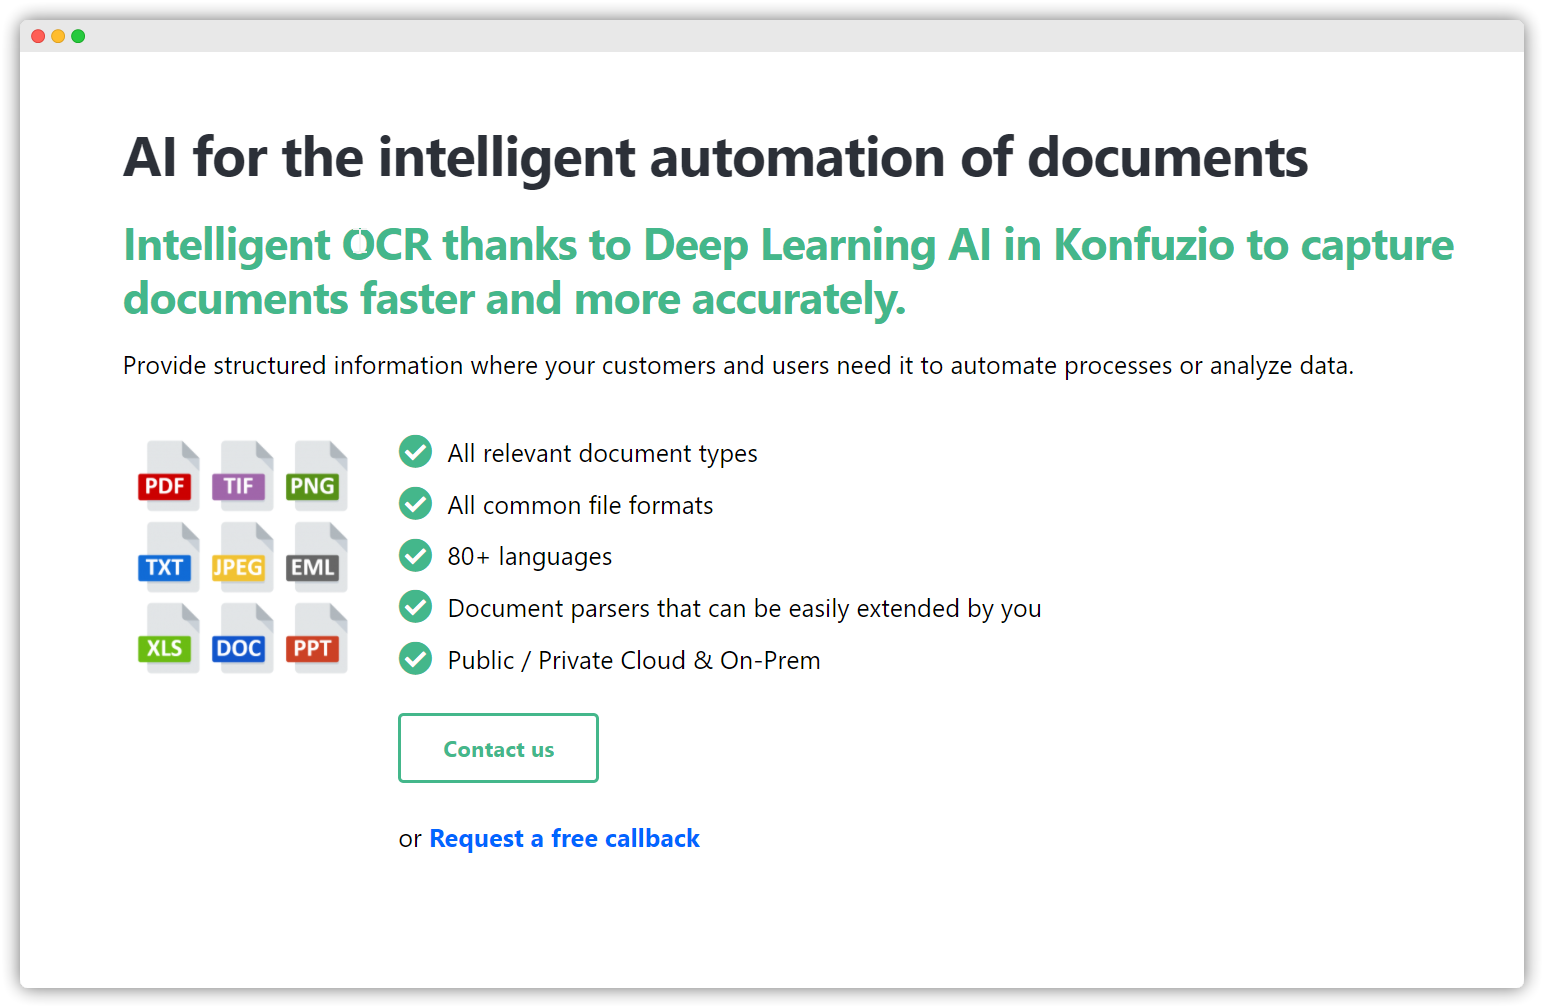

In [2]:
from pathlib import Path
from IPython.display import Image

document_name = "example_document.png"
! wget -q https://raw.githubusercontent.com/konfuzio-ai/konfuzio-sdk/master/tests/test_data/png.png -O {document_name}
document_path = Path(f"{document_name}")
print(f"You have downloaded a sample document to the following path: {document_path}")
print("Here is a preview of the raw document:")
Image(filename=document_name, width=1000)

### Konfuzio SDK imports

In [3]:
from konfuzio_sdk.data import Project, Document, Bbox
from konfuzio_sdk.api import create_new_project
from konfuzio_sdk.tokenizer.regex import WhitespaceTokenizer
from konfuzio_sdk import KONFUZIO_HOST
from PIL import ImageDraw

### Create a new Konfuzio Project

In [4]:
project_id = create_new_project(project_name="My KonfuzioSDK Project")
project = Project(id_=project_id)
project_url = f"{KONFUZIO_HOST}/admin/server/document/?project={project.id_}"
print(f"🎉 You have created a new Konfuzio Project via the SDK!\n\nClick here to view it on Konfuzio Server:\n{project_url}")

🎉 You have created a new Konfuzio Project via the SDK!

Click here to view it on Konfuzio Server:
https://app.konfuzio.com/admin/server/document/?project=15282


### Upload a new Document to Konfuzio Server

In [8]:
document = Document.from_file(str(document_path), project=project, sync=True)
print(f'Document {document.id_} successfully created.')
document_url = f"{KONFUZIO_HOST}/d/{document.id_}/"
print(f"🥳 You have created a new Document and uploaded it to Konfuzio Server!\n\nClick here to view it:\n{document_url}")

Document 5950309 successfully created.
🥳 You have created a new Document and uploaded it to Konfuzio Server!

Click here to view it:
https://app.konfuzio.com/d/5950309/


### Get OCR-extracted text from the Document

In the previous cell, you've uploaded a Document to Konfuzio Server. \
The Server already did OCR processing and returned the Document with this additional information.

Let's take a look! 👀

In [9]:
text = document.text

display(Markdown(text))




        Al for the intelligent automation of documents
        Intelligent OCR thanks to Deep Learning Al in Konfuzio to capture
        documents faster and more accurately.
        Provide structured information where your customers and users need it to automate processes or analyze data.

                           All relevant document types
         PDF   TIF  PNG       All common file formats
         TXT  JPEG  EML       80+ languages
                            Document parsers that can be easily extended by you
         XLS  DOC  PPT       Public / Private Cloud & On-Prem

                           Contact us

                         or Request a free callback









### Get and show all words within the Document

First we apply a [WhiteSpaceTokenizer](https://dev.konfuzio.com/sdk/tutorials/tokenizers/index.html#whitespace-tokenization) to the Document, which will seperate the single characters of the text into words by splitting the text based on a white spaces. \



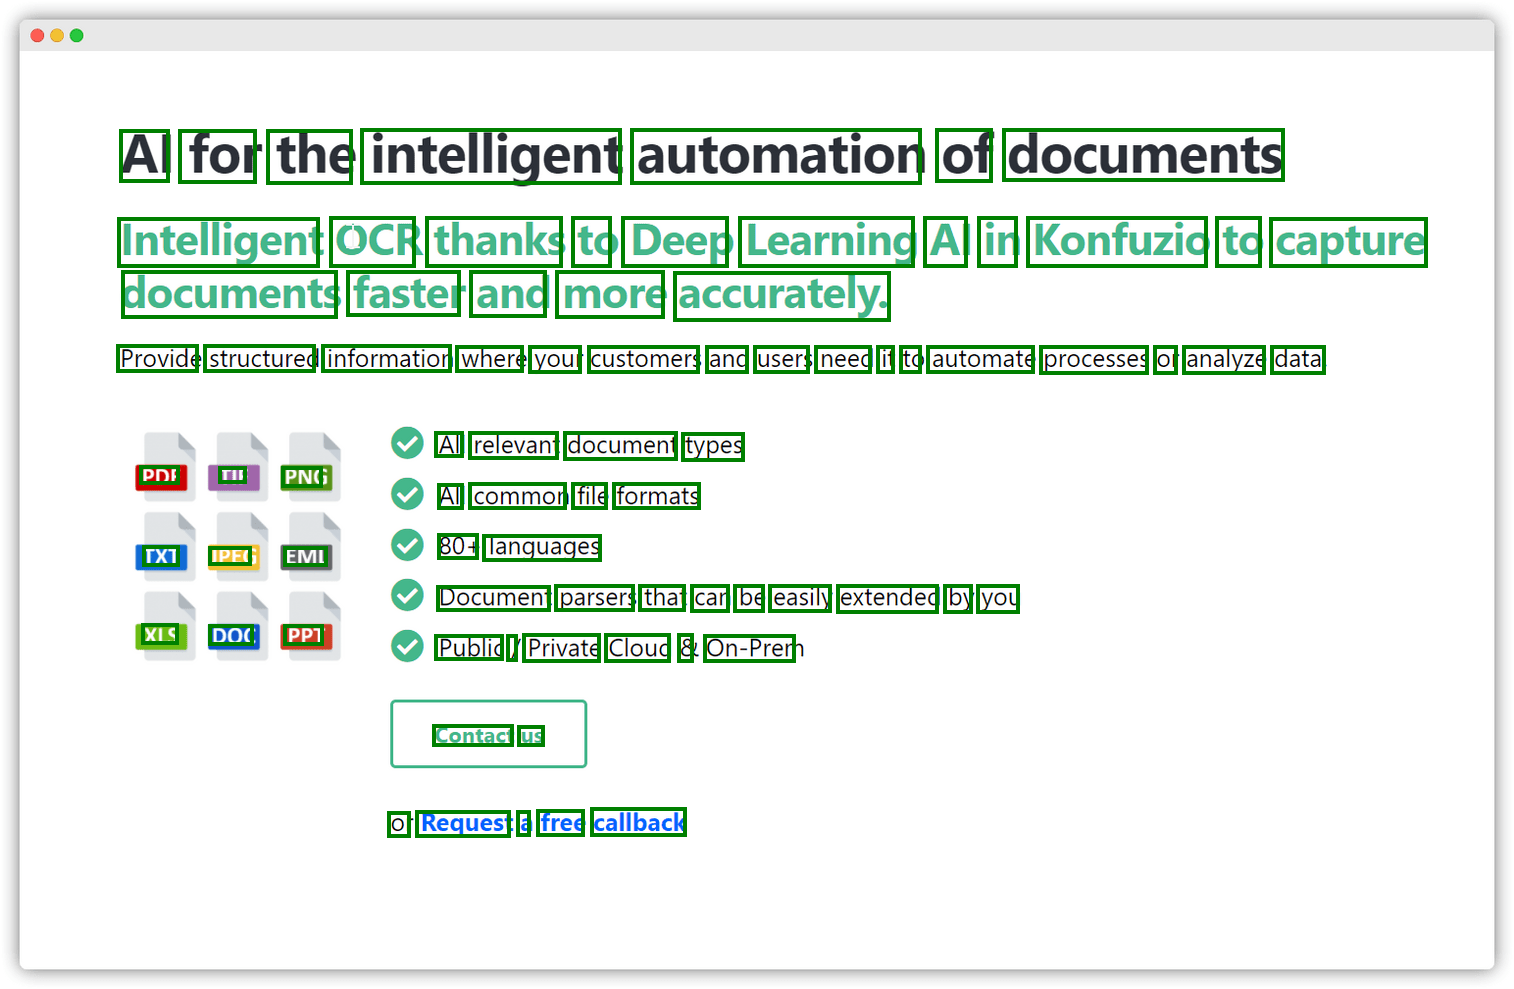

In [10]:
# apply white space tokanization
tokenizer = WhitespaceTokenizer()
tokenized_document = tokenizer.tokenize(document)
spans = tokenizer.found_spans(tokenized_document)

# get the image of the first page and also the bounding boxes of the Spans (words)
page_index = 0 # first page only
page = document.pages()[page_index]
image = page.get_image(update=True)
image = image.convert('RGB')
bboxes = [span.bbox() for span in spans if span.page.index==page_index]
bboxes_image = [(bbox.x0_image, bbox.y0_image, bbox.x1_image, bbox.y1_image) for bbox in bboxes]

# draw the boxes into the image, save and show it
draw = ImageDraw.Draw(image)
for box in bboxes_image:
    draw.rectangle(box, outline='green', width=4)

document_segmented_path = f"{document_path.name}_segmented.png"
image.save(document_segmented_path)
Image(filename=document_segmented_path, width=1200)

# **Documentation and Tutorials** 📄

Konfuzio SDK comes with an extensive documentation and accompanying tutorials. \
Check it out here 📣

- [Development Documentation](https://dev.konfuzio.com/index.html)
- [Python API Reference](https://dev.konfuzio.com/sdk/sourcecode.html#api-reference)
- [SDK Tutorials](https://dev.konfuzio.com/sdk/tutorials.html#tutorials)

In [ ]:
# Now you can continue writing your own python code using Konfuzio SDK.. 🧑‍💻